
# Introduction
- In this kernel, we are going to predict whether a credit card is fraud or not using Machine Learning.

- The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- Due to confidentiality issues, the input variables are transformed into numerical using PCA transformations.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
sns.set_theme(style="whitegrid")
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import skew
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EXPLORE DATA

In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
null_df = pd.DataFrame(data.isnull().sum())
null_df

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


#### There is no null values.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


- Since, the dataset contains no null or missing values and all the features seem to be scaled properly, there seems to be no need of any preprocessing. Only the features Time & Amount are required to be scaled.
- Looking to the Time feature, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds)

# EDA

In [8]:
group = data.groupby('Class')['Time'].count()
fig = go.Figure()
fig.add_trace(go.Bar(name='counts',x=group.index, y=group.values, marker_line_color='black', marker_line_width=2,
                     text=group.values,textposition='outside'))
fig.update_yaxes(title_text='Number of Cases')
fig.update_xaxes(title_text='Case',nticks=3)
fig.update_layout(template='seaborn',hovermode='closest',title='Number of Fraud vs Non-Fraud Cases',
                 width=700,height=400,xaxis=dict(mirror=True,linecolor='black',linewidth=2),
                 yaxis=dict(mirror=True,linecolor='black',linewidth=2),margin=dict(t=50,b=0,l=70,r=0))
fig.show()

In [9]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

- ###  Data is imbalanced
- ####  We will use resmaling techniques.

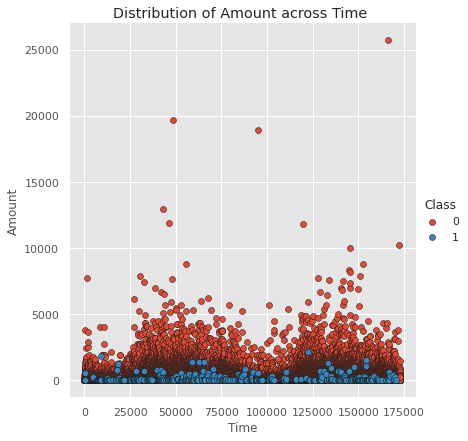

In [10]:
plt.style.use("ggplot")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount", edgecolor="k").add_legend()

plt.title("Distribution of Amount across Time ")
plt.show()

- #### The above plot shows that there are frauds only on the transactions which have transaction amount less than 2500 (approx).
- #### However, the frauds in the transactions are evenly distributed throughout all times.
- #### The time is shown is seconds from the start of the time period (totaly 48h, over 2 days)

### distribution of Amount and Time

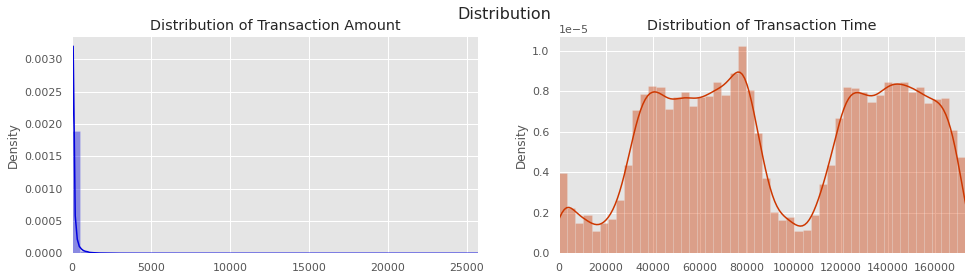

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Distribution', fontsize=16)
amount_val = data['Amount'].values
time_val = data['Time'].values
colors = ["#0101DF", "#CD3700"]
sns.distplot(amount_val, ax=ax[0], color=colors[0])
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color=colors[1])
ax[1].set_title('Distribution of Transaction Time')
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

### Transcations Density plot

In [12]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [13]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
class_0 = data.loc[data['Class'] == 0]["Amount"]
class_1 = data.loc[data['Class'] == 1]["Amount"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Amount Density Plot', xaxis=dict(title='Amount [Euro]'))
iplot(fig, filename='dist_only')

- #### Since, it is a little difficult to see. Let's engineer a new feature of bins.

In [14]:
data['Amount_Bins'] = ''


In [15]:
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels

#### Customers segmentation (class A and class B)

In [16]:
bins, bin_labels = make_bins(data.Amount, size=10)
bin_labels

['0 to 2854',
 '2854 to 5709',
 '5709 to 8563',
 '8563 to 11418',
 '11418 to 14272',
 '14272 to 17127',
 '17127 to 19982',
 '19982 to 22836',
 '22836 to 25691']

- #### Creating Bin column

In [17]:
data['Amount_Bins'] = pd.cut(data.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)
data['Amount_Bins'].head().to_frame()

,Amount_Bins
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


In [18]:
data['Amount_Bins'].value_counts()

0 to 2854         284484
2854 to 5709         285
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
14272 to 17127         0
19982 to 22836         0
Name: Amount_Bins, dtype: int64

Text(0.5, 1.0, 'Transaction Amount Classes')

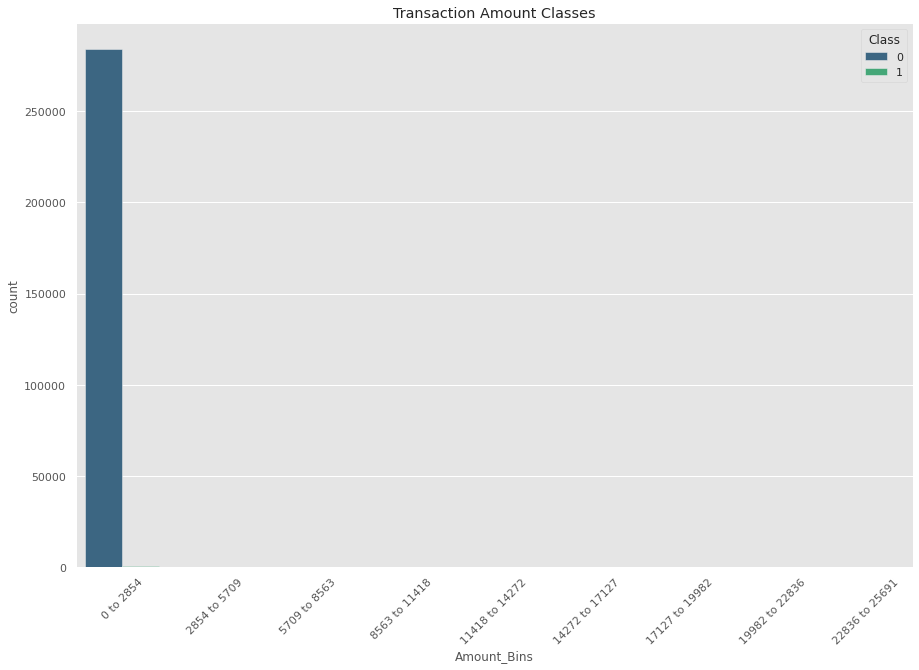

In [19]:

plt.figure(figsize=(15, 10))
sns.countplot(x='Amount_Bins', data=data, palette= "viridis",hue='Class')
plt.xticks(rotation=45)
plt.title("Transaction Amount Classes")



Text(0.5, 1.0, 'Transaction Amount Classes')

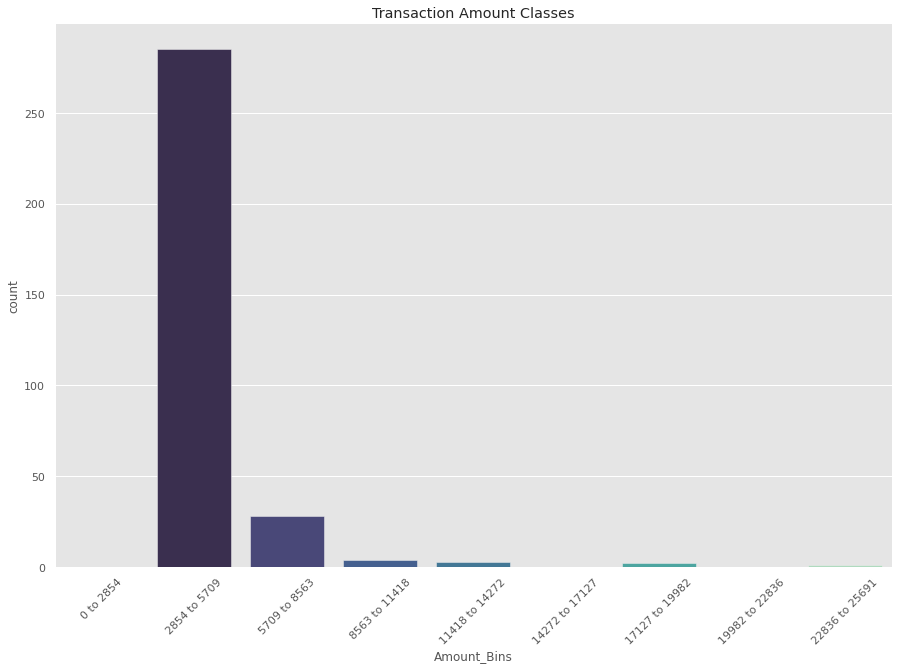

In [20]:
# Since, count of values of Bins other than '0 to 2854' are difficult to view. Let's not insert the first one.

plt.figure(figsize=(15, 10))
sns.countplot(x='Amount_Bins',palette="mako",data=data[~(data['Amount_Bins'] == '0 to 2854')])
plt.xticks(rotation=45)
plt.title("Transaction Amount Classes")


- #### We can see that mostly the amount is between 0 and 2854 euros.


### Converting Time into hours to get some statistics on Transactions during these hours.

In [21]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']

df

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.00,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.00,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.00,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.00,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.00,4002.88,1555,106989.39,68.803466,17.900,45355.430437
...,...,...,...,...,...,...,...,...,...
89,45.0,1,12.31,39.98,2,52.29,26.145000,26.145,382.814450
90,46.0,0,0.00,25691.16,6458,449369.58,69.583397,15.000,132269.354973
91,46.0,1,0.00,634.30,6,1433.23,238.871667,194.490,67185.062017
92,47.0,0,0.00,10199.44,4852,333212.69,68.675328,14.000,56123.940988


Text(0.5, 0.98, 'Total Amount')

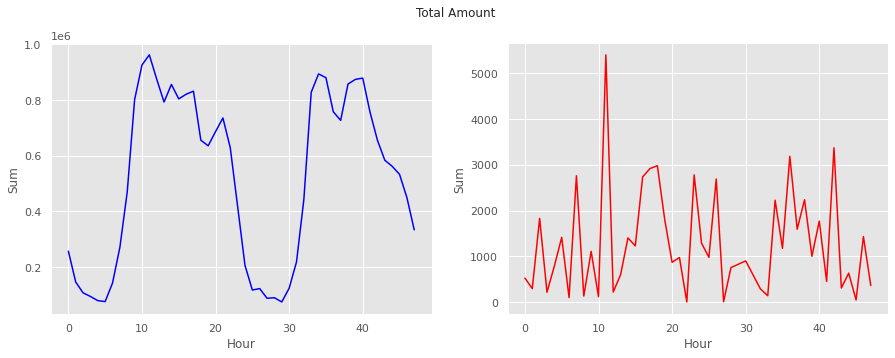

In [22]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))

s = sns.lineplot(ax = ax1 ,x="Hour", y="Sum", data=df.loc[df.Class==0] ,color="blue")
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")

Text(0.5, 0.98, 'Total Number of Transactions')

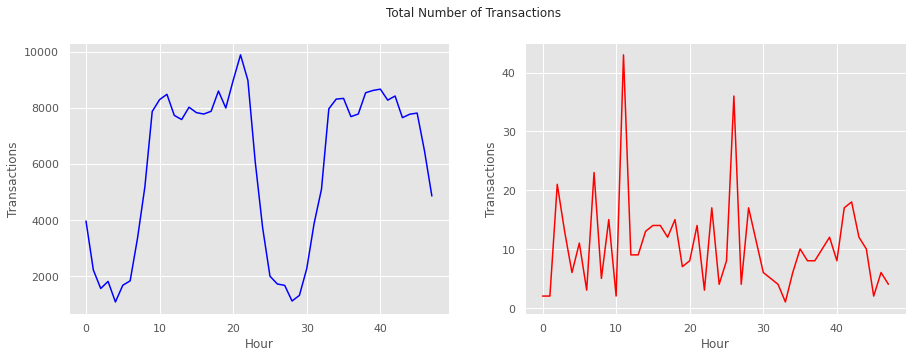

In [23]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))

s = sns.lineplot(ax = ax1 ,x="Hour", y="Transactions", data=df.loc[df.Class==0] ,color="blue")
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")

Text(0.5, 0.98, 'Average Amount of Transactions')

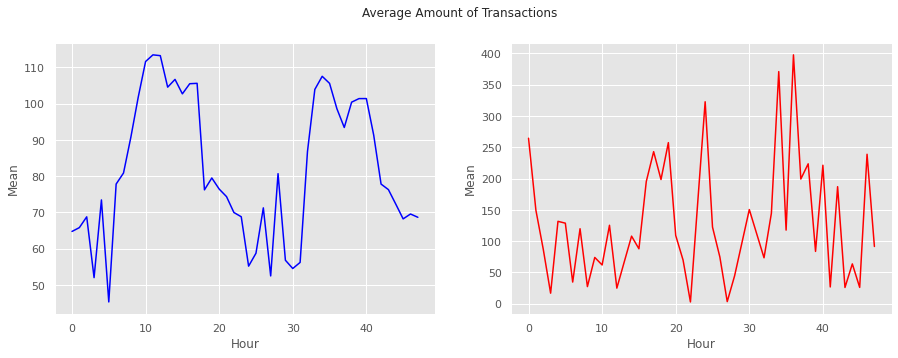

In [24]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))

s = sns.lineplot(ax = ax1 ,x="Hour", y="Mean", data=df.loc[df.Class==0] ,color="blue")
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")

Text(0.5, 0.98, 'Maximum Amount of Transactions')

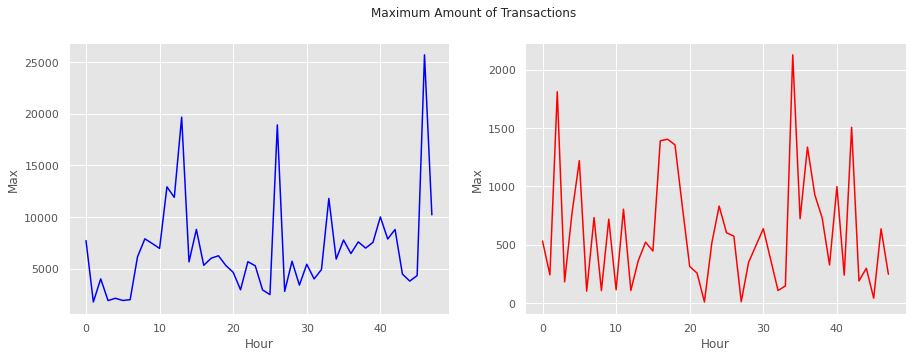

In [25]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))

s = sns.lineplot(ax = ax1 ,x="Hour", y="Max", data=df.loc[df.Class==0] ,color="blue")
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")

Text(0.5, 0.98, 'Median Amount of Transactions')

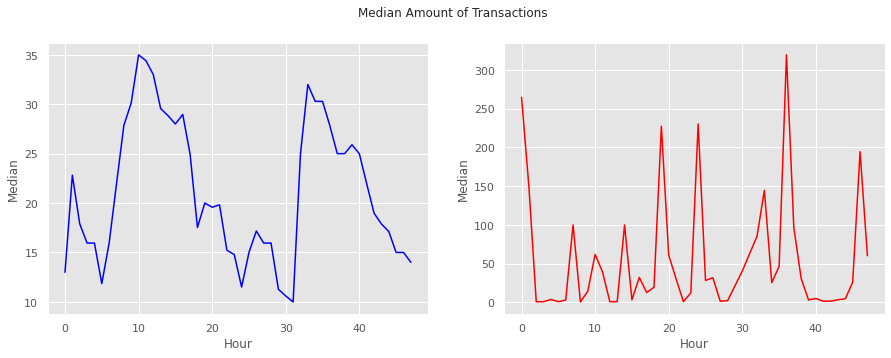

In [26]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))

s = sns.lineplot(ax = ax1 ,x="Hour", y="Median", data=df.loc[df.Class==0] ,color="blue")
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")

Text(0.5, 0.98, 'Minimum Amount of Transactions')

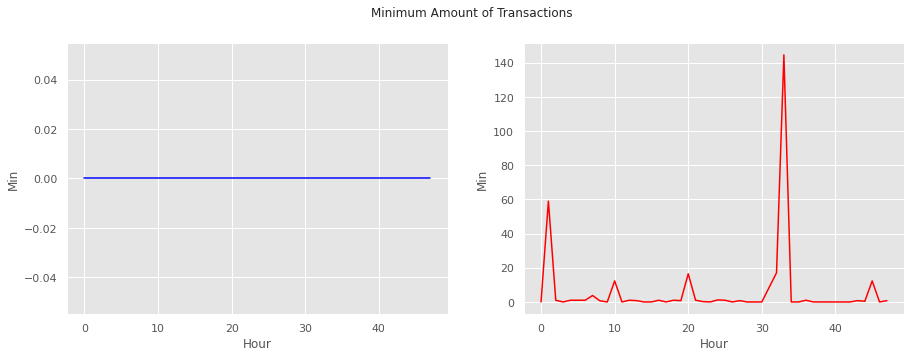

In [27]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))

s = sns.lineplot(ax = ax1 ,x="Hour", y="Min", data=df.loc[df.Class==0] ,color="blue")
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")

### Boxplot showing Amount distribuition for each class 

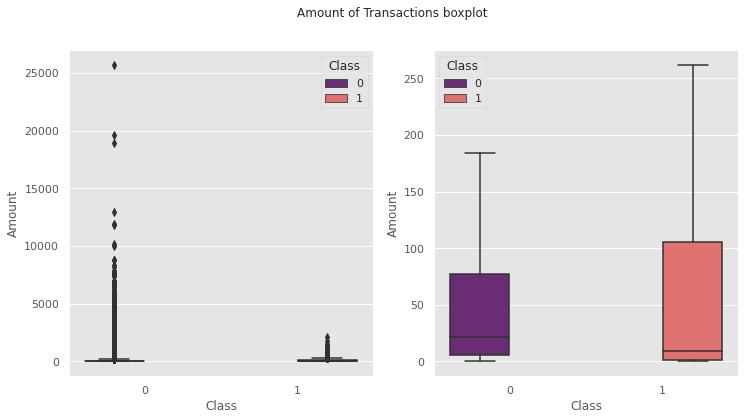

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette="magma",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette="magma",showfliers=False)
plt.suptitle("Amount of Transactions boxplot")
plt.show()
# 1 >>> FRAUD 
# 0 >>> NON FRAUD

- #### There are outliers in non-fraudulent transactions : class 0

- ####  The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers as fradudulent transcations has max amount of approx. 2500.

### Correlation Matrix 

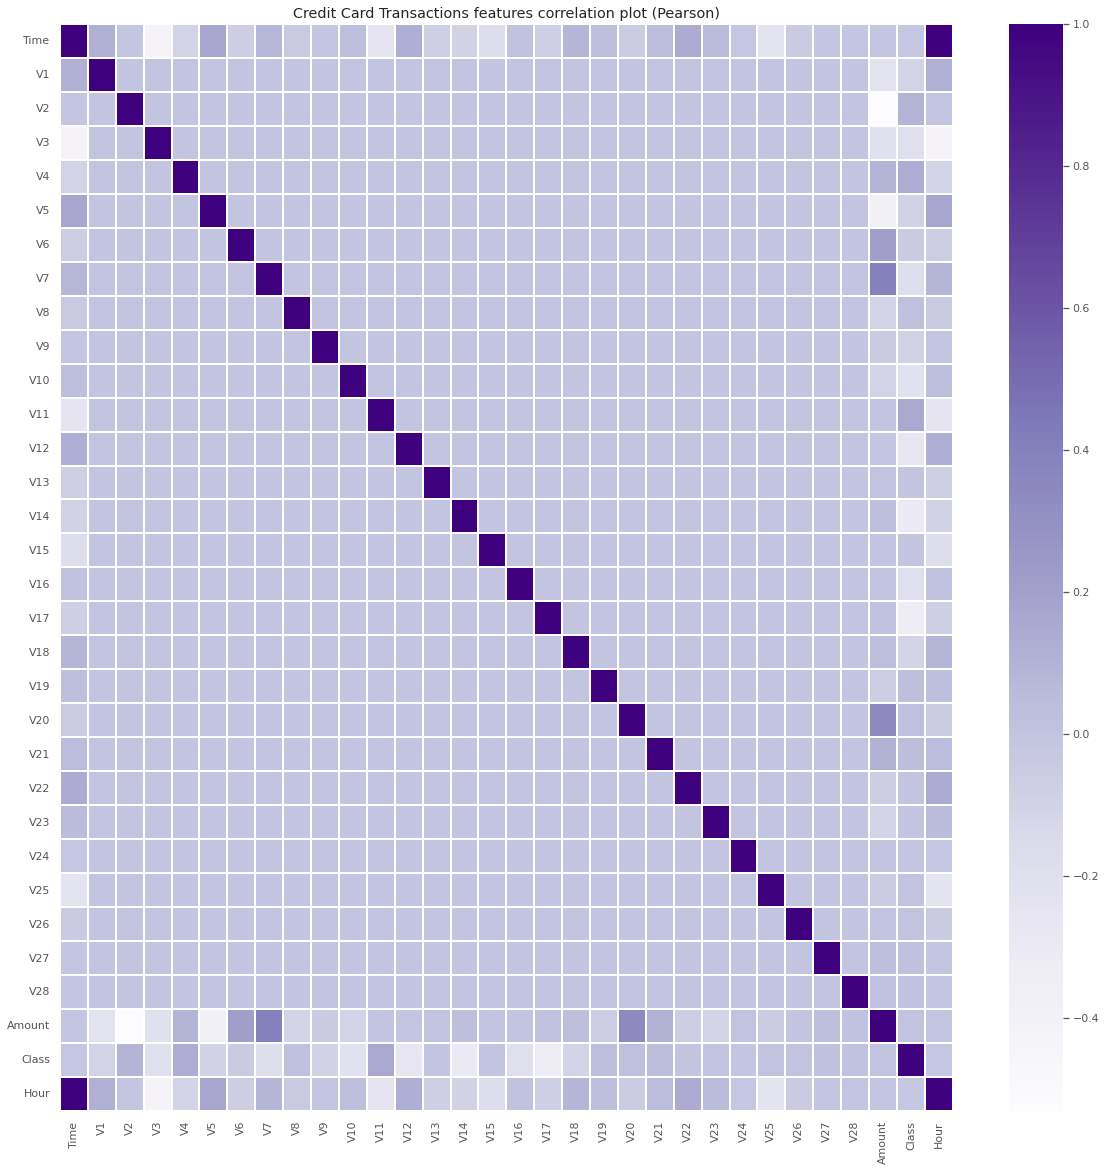

In [29]:
plt.figure(figsize = (20,20))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Purples" )
plt.show()

- #### As expected, We observe that none of the V1 to V28 componenets are correlated and have no correlation to each other
 

- #### There are certain correlations between some of these features AND "AmounT" (direct correlation with V7 and V20, inverse correlation with V2 and V5).

.



### Let's plot the correlated and inverse correlated values on the same graph.


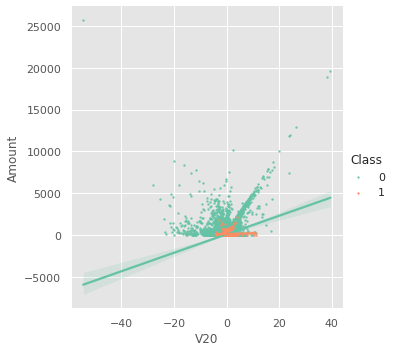

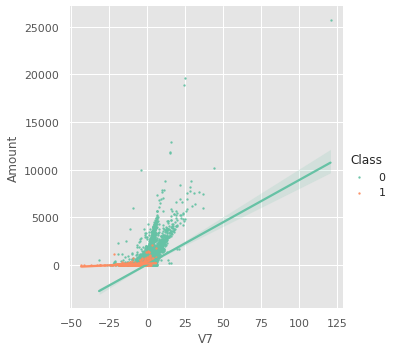

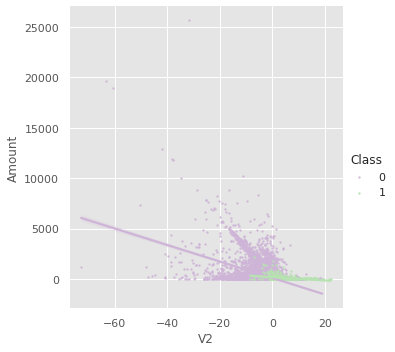

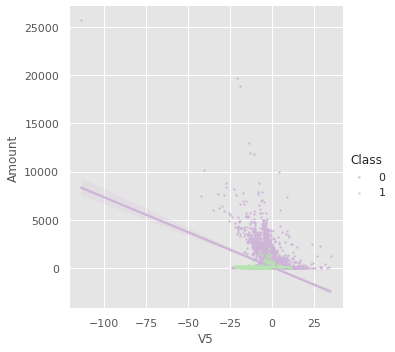

In [30]:

s = sns.lmplot(x='V20', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2}, palette="Set2")
s = sns.lmplot(x='V7', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2}, palette="Set2")
plt.show()

s = sns.lmplot(x='V2', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2}, palette="PRGn")
s = sns.lmplot(x='V5', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2}, palette="PRGn")
plt.show()

### Features Density Plot

In [31]:
var = data.columns.values
var

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class', 'Amount_Bins', 'Hour'], dtype=object)

In [32]:
var[1:29]

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype=object)

### Ploting Density Distribiution for features V1 : V28

<Figure size 432x288 with 0 Axes>

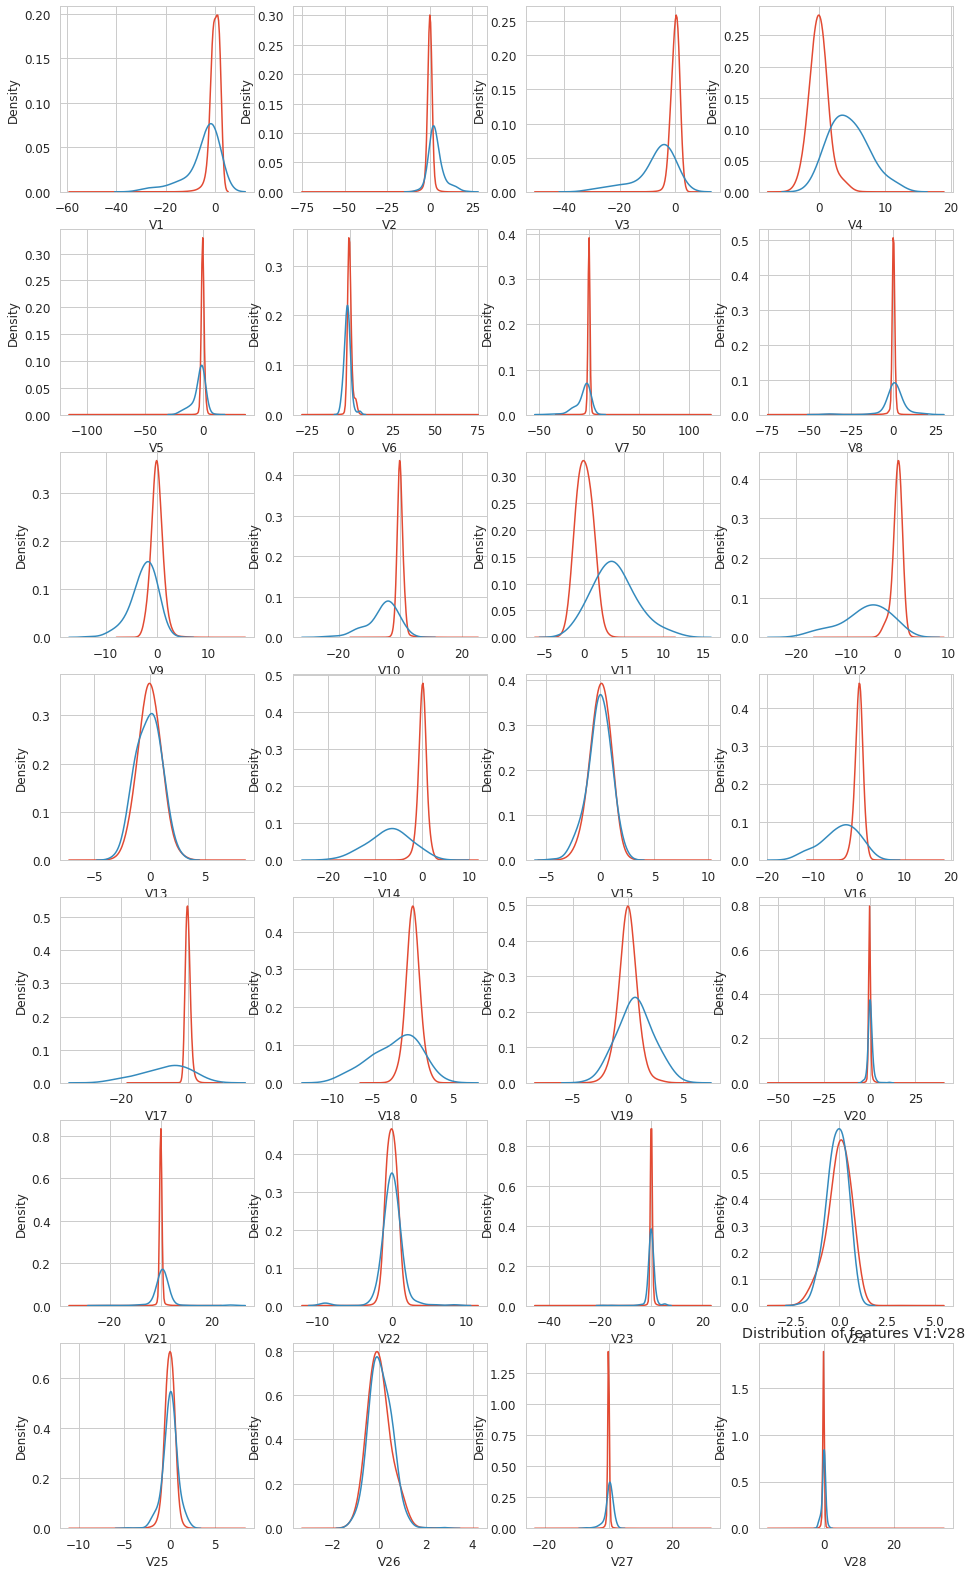

In [33]:


i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(16,28))
plt.title("Distribution of features V1:V28 ")
for i,j in enumerate(var[1:29]):
    plt.subplot(7,4,i+1)
    sns.kdeplot(t0[j], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[j], bw=0.5,label="Class = 1")
    plt.xlabel(j, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

- #### For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

- #### the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

#  Data Preprocessing 

### Feature Scaling

- #### Scaling Time and Amount Columns with Robust scaler 
- #### new columns for the scaled Features (scaled_time', scaled_amount')
- #### drop Time, Amount , Hour and , Amount_Bins columns

In [34]:

rob_scaler = RobustScaler()
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Time','Amount'], axis=1, inplace=True)

In [35]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

#scaled_amount and scaled_time are added to the starting of the dataframe
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Bins,Hour
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0 to 2854,0.0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0 to 2854,0.0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0 to 2854,0.0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0 to 2854,0.0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0 to 2854,0.0


In [36]:
data_copy= data.copy()

In [37]:
data.drop(["Hour","Amount_Bins"], axis=1, inplace=True)

In [38]:
data

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.296653,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,0.038986,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,0.641096,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.167680,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


# modeling & evaluation

### Handling Imbalaced Data
- Under sampling 
- NearMiss Under sampling 
- SMOTE (Oversampling )
- SMOTETomek

#### Under Sampling 

In [39]:
#Random Under Sampling

from imblearn.under_sampling import RandomUnderSampler

X = data.drop('Class', axis=1)
y = data['Class']
rus = RandomUnderSampler(random_state=42)
X_rs, y_rs = rus.fit_resample(X,y)

- #### Random Under-sampled Dataframe

In [40]:

df_rs = pd.DataFrame(np.hstack((X_rs,y_rs[:, None])), columns=data.columns)
df_rs.Class = df_rs.Class.astype(int)
df_rs.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.296793,-0.026340,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,...,-0.058040,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0
1,-0.249004,-0.401062,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,...,-0.081298,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,0
2,-0.097813,-0.347361,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,...,0.065716,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,0
3,0.489066,0.374534,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,...,-0.169706,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,0
4,-0.307413,0.067458,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,...,-0.282777,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0


### Frauds vs. Non-Frauds for the new dataframe

In [41]:

group = df_rs.groupby('Class')['scaled_time'].count()
fig = go.Figure()
fig.add_trace(go.Bar(name='counts',x=group.index, y=group.values, marker_line_color='black', marker_line_width=2,
                     text=group.values,textposition='outside'))
fig.update_yaxes(title_text='Number of Cases')
fig.update_xaxes(title_text='Case',nticks=3)
fig.update_layout(template='seaborn',hovermode='closest',title='Number of Fraud vs Non-Fraud Cases',
                 width=700,height=400,xaxis=dict(mirror=True,linecolor='black',linewidth=2),
                 yaxis=dict(mirror=True,linecolor='black',linewidth=2),margin=dict(t=50,b=0,l=70,r=0))
fig.show()

#### Correlation Matrix for Original DataFrame and Undersampled data

In [42]:
fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=['Correlation Matrix for the original dataframe','Correlation Matrix for the undersampled dataframe'])

fig.add_trace(go.Heatmap(name='original df',z=data.corr().values,x=data.corr().index,y=data.corr().index,
                         coloraxis='coloraxis'),1,1)
fig.add_trace(go.Heatmap(name='undersampled df',z=df_rs.corr().values,x=df_rs.corr().index,y=df_rs.corr().index,
                         coloraxis='coloraxis'),2,1)
fig.update_layout(height=800,width=700,coloraxis = {'colorscale':'BrBG'})
fig.show() 


- My main aim is to find the features which influence a transaction to be fraudulant. In order to achieve this, I will focus on the last column of the plot where the correlation between various features and the Class is computed. The following is my analysis:-

- Positive Correlation: Features V2, V4, V11 & V19 show positive correlation with class. The higher the values of these features, the higher the chances of a transaction being fraudulant.
- Negative Correlation: Features V10, V12, V14 & V17 show negative correlation with class. The lower the values of these features, the higher the chances of a transaction being fraudulant.  

#### Box-Plots for Negative Correlation

In [43]:
## # let's thier boxplot now 

rows=1
cols=4
features = ['V10','V12','V14','V17']
fig = make_subplots(rows=rows,cols=cols,subplot_titles=['V10 vs Class','V12 vs Class','V14 vs Class','V17 vs Class'])
for r in range(1,rows+1):
    for c in range(1,cols+1):
        fig.add_trace(go.Box(name=features[r+c-2],x=df_rs['Class'],y=df_rs[features[r+c-2]]),r,c)
        fig.update_xaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
        fig.update_yaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
fig.update_layout(width=700,template='seaborn',title='Boxplots for Negative Correlations')

#### Boxplot for Positive correlated Features

In [44]:
## # let's thier boxplot now 

rows=1
cols=4
features = ['V2','V4','V11','V19']
fig = make_subplots(rows=rows,cols=cols,subplot_titles=['V2 vs Class','V4 vs Class','V11 vs Class','V19 vs Class'])
for r in range(1,rows+1):
    for c in range(1,cols+1):
        fig.add_trace(go.Box(name=features[r+c-2],x=df_rs['Class'],y=df_rs[features[r+c-2]]),r,c)
        fig.update_xaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
        fig.update_yaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
fig.update_layout(width=700,template='seaborn',title='Boxplots for Positive Correlations')

### function detects outliers in each column.

In [45]:
def DEF_outliers(data , col):
    OUT=pd.DataFrame(columns=[ "num_outliers" ],index=[col])

    for col_ in col:
        count_under = 0
        count_upper = 0
        outlier=data[col_].loc[df_rs['Class'] == 1].values
        Q1=np.percentile(outlier, 25)
        Q3=np.percentile(outlier, 75)
        IQR=Q3-Q1
        underoutliers=Q1-1.5*IQR
        upperoutliers=Q3+1.5*IQR
        #under_border=(outlier<underoutliers)
        #upper_border=(outlier>upperoutliers)
        outliers = [x for x in outlier if x < underoutliers or x > upperoutliers]

        #print(under_border.value_counts())
        #print(upper_border.value_counts())
        #OUT.loc[col_,"< Q1"] = sum(under_border)
       # OUT.loc[col_,"> Q3"] = sum(upper_border)
        OUT.loc[col_ , 'num_outliers'] = len(outliers)
      
         
    return OUT

##### Function removes outlies from each column

In [46]:
new_df_UNDER_out = df_rs.copy()
def cut(df,feature):
        outlier=df[feature].loc[df['Class'] == 1].values
        Q1=np.percentile(outlier, 25)
        Q3=np.percentile(outlier, 75)
        IQR=Q3-Q1
        underoutliers=Q1-1.5*IQR
        upperoutliers=Q3+1.5*IQR
        df = df.drop(df[(df[feature] > upperoutliers) | (df[feature] < underoutliers)].index)
        return df

In [47]:
num_col = ['V14' , 'V10','V12']


In [48]:
new_df_UNDER_out = cut(new_df_UNDER_out,'V14')

In [49]:
# let's remove from v12 now
new_df_UNDER_out = cut(new_df_UNDER_out,'V12')

In [50]:
# let's remove from v10 
new_df_UNDER_out = cut(new_df_UNDER_out,'V10')

### Boxplot After Removing Outliers. 

In [51]:
## # let's thier boxplot now 

rows=1
cols=3
features = ['V14','V12','V10']
fig = make_subplots(rows=rows,cols=cols,subplot_titles=['V14 vs Class','V12 vs Class','V10 vs Class'])
for r in range(1,rows+1):
    for c in range(1,cols+1):
        fig.add_trace(go.Box(name=features[r+c-2],x=new_df_UNDER_out['Class'],y=new_df_UNDER_out[features[r+c-2]]),r,c)
        fig.update_xaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
        fig.update_yaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
fig.update_layout(width=700,template='seaborn',title='Boxplots After removing outliers')

### Train , Test Split 

In [52]:
X = new_df_UNDER_out.drop('Class', axis=1)
y = new_df_UNDER_out['Class']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [54]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

### Applying Cross Validation  for every classifier and print its score.

In [55]:
# score of trainig after using cross validation
print("cross validation score: ")
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", key, "Has a training score of", round(training_score.mean(), 2) * 100, "% ")

cross validation score: 
Classifiers:  LogisiticRegression Has a training score of 94.0 % 
Classifiers:  KNearest Has a training score of 93.0 % 
Classifiers:  Support Vector Classifier Has a training score of 94.0 % 
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % 
Classifiers:  Random Forest Has a training score of 94.0 % 


##  grid search to select the best paramters

In [56]:
# Logistic Regression

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg_clf = grid_log_reg.best_estimator_


# knn
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knn_clf = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc_clf = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# tree best estimator
tree_clf = grid_tree.best_estimator_

# random forest classifier
rf_grid = { 
    'n_estimators': [ 100,200,500],
    'max_depth' : [5,6,7,8],
    
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_grid)
grid_rf.fit(X_train, y_train)
rf_clf = grid_rf.best_estimator_

#### Classifies with their best parameters

In [57]:
classifiers1 ={}
classifiers1["LogisiticRegression"] = log_reg_clf
classifiers1["KNearest"] = knn_clf
classifiers1["Support Vector Classifier"] = svc_clf
classifiers1["DecisionTreeClassifier"] = tree_clf
classifiers1["Random Forest"] = rf_clf

classifiers1

{'LogisiticRegression': LogisticRegression(C=0.1),
 'KNearest': KNeighborsClassifier(n_neighbors=3),
 'Support Vector Classifier': SVC(C=1),
 'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=3, min_samples_leaf=5),
 'Random Forest': RandomForestClassifier(max_depth=7, max_features='sqrt')}

### Classifiers score after applying Grid search

In [58]:
print("score after appling grid search : ")
for key, classifier in classifiers1.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", key, "Has a training score of", round(training_score.mean(), 2) * 100, "% ")

score after appling grid search : 
Classifiers:  LogisiticRegression Has a training score of 94.0 % 
Classifiers:  KNearest Has a training score of 94.0 % 
Classifiers:  Support Vector Classifier Has a training score of 94.0 % 
Classifiers:  DecisionTreeClassifier Has a training score of 92.0 % 
Classifiers:  Random Forest Has a training score of 93.0 % 


#### overfitting case

In [59]:
def plot_learning_curve(estimator1,  X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ax1 = plt.subplots(1,1, figsize=(10,7), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#3256a8")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#a85132")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#3256a8",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#a85132",
             label="Cross-validation score")
    ax1.set_title(str(estimator1) + " Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    return plt

In [60]:
n_jobs = 4
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

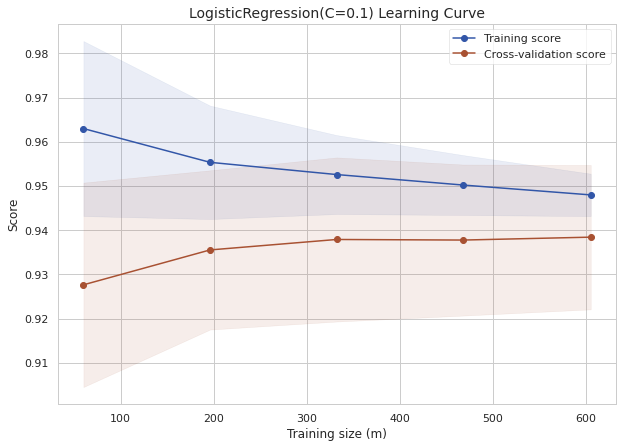

In [61]:
plot_learning_curve(log_reg_clf ,X_train, y_train,cv=cv, n_jobs=n_jobs)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

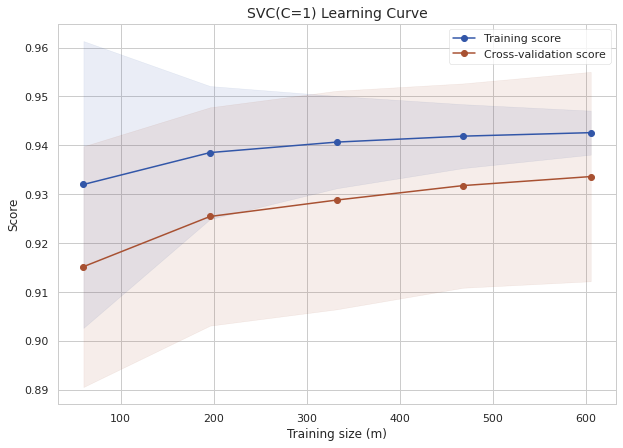

In [62]:
plot_learning_curve(svc_clf ,X_train, y_train,  cv=cv, n_jobs=n_jobs)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

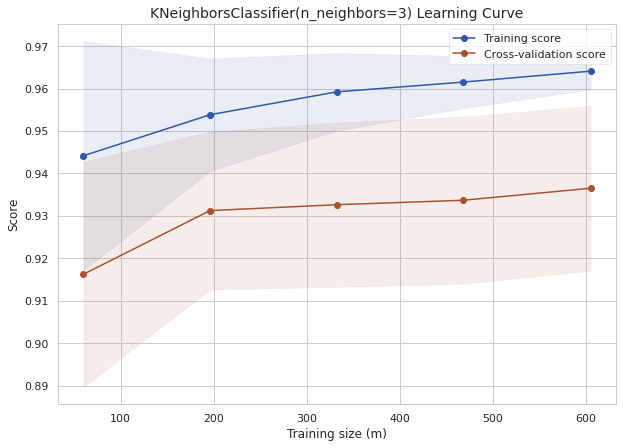

In [63]:
plot_learning_curve(knn_clf ,X_train, y_train,  cv=cv, n_jobs=n_jobs)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

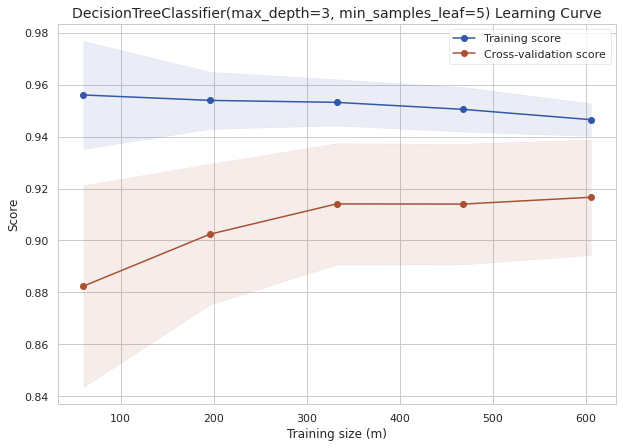

In [64]:
plot_learning_curve(tree_clf ,X_train, y_train,  cv=cv, n_jobs=n_jobs)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

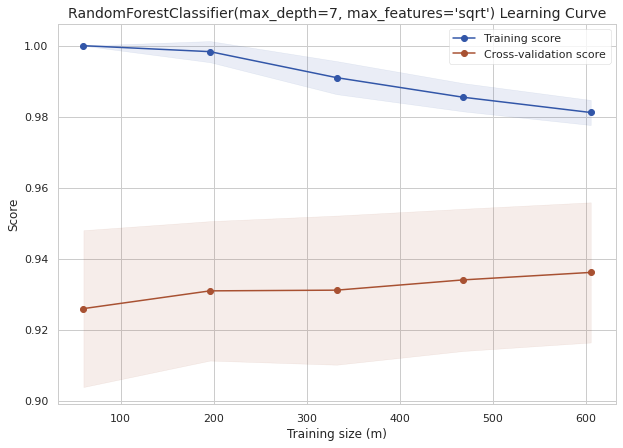

In [65]:
plot_learning_curve(rf_clf ,X_train, y_train,  cv=cv, n_jobs=n_jobs)

### ROC Curve for all classifiers

In [66]:
from sklearn.metrics import roc_curve

log_pred = log_reg_clf.predict(X_test)
svc_pred = svc_clf.predict(X_test)
tree_pred = tree_clf.predict(X_test)
knear_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, knear_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_pred)

fig = go.Figure()
fig.update_yaxes(title_text='True Positive Rate')
fig.update_xaxes(title_text='False Positive Rate',nticks=3)
fig.add_trace(go.Scatter(name='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_pred)),
                         x=log_fpr,y=log_tpr,mode='lines'))

fig.add_trace(go.Scatter(name='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)),
                         x=svc_fpr,y=svc_tpr,mode='lines'))
fig.add_trace(go.Scatter(name='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)),
                         x=tree_fpr,y=tree_tpr,mode='lines'))
fig.add_trace(go.Scatter(name='K-Nearest Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knear_pred)),
                         x=knear_fpr,y=knear_tpr,mode='lines'))
fig.add_trace(go.Scatter(name='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred)),
                         x=knear_fpr,y=knear_tpr,mode='lines'))
fig.add_trace(go.Scatter(name='AUC-ROC=0.5',x=[0,1],y=[0,1],line=dict(dash='dot'),showlegend=False))
fig.update_layout(
  
     width=700,height=600,xaxis=dict(mirror=True,linewidth=2,linecolor='black'),
    yaxis=dict(mirror=True,linewidth=2,linecolor='black'),
    title='ROC Curve<br>(All Classifiers)',
    template='seaborn',
    legend=dict(
        x=0.46,
        y=0,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="white",
        bordercolor="white",
        borderwidth=2
    ), annotations=[
        dict(
            x=0.5,
            y=0.5,
            xref="x",
            yref="y",
            text="Minimum ROC Score of 50% <br> (This is the minimum score to get)",
            showarrow=True,
            arrowhead=7,
            ax=40,
            ay=50
        )
    ]
)

fig.show()

- #### From the above curve it can be seen that the KNearest Neighbors Classifier has the highest area under the ROC curve and hence, seems to be the best model according to this metric.

- #### Now, I will generate the Classification report for all the 4 Classifers so that we can judge which one is the best of the lot in terms of the metrics: precision, recall, f1-score and support. The Classification report will show all these metrics for both the classes(Fraud and Non-Fraud)

### Classification report

In [67]:
labels = ['No Fraud', 'Fraud']
print('Logistic Regression:')
print(classification_report(y_test, log_pred, target_names=labels))
print("-"*100)
print('KNearest Neighbours:')
print(classification_report(y_test, knear_pred, target_names=labels))
print("-"*100)
print('Support Vector Classifier:')
print(classification_report(y_test, svc_pred, target_names=labels))
print("-"*100)
print('Decision Tree:')
print(classification_report(y_test, tree_pred, target_names=labels))


print("-"*100)
print('Random Forest:')
print(classification_report(y_test, rf_pred, target_names=labels))

Logistic Regression:
              precision    recall  f1-score   support

    No Fraud       0.92      0.96      0.94       100
       Fraud       0.95      0.91      0.93        90

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

----------------------------------------------------------------------------------------------------
KNearest Neighbours:
              precision    recall  f1-score   support

    No Fraud       0.92      0.97      0.95       100
       Fraud       0.96      0.91      0.94        90

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

----------------------------------------------------------------------------------------------------
Support Vector Classifier:
              precision    recall  f1-score   support

    No Fraud       0

#### we can see logistic regression and knn are the best estimtors which have the highest recall anf f1_score.

#### NearMiss Under sampling


### Orginal_Data Spliting 
#### Spliting Using StratifiedKFold to Ensure Same Distribuition for classes 


In [68]:
###### Percentatge of fraud and legitimate Transactions.
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [69]:
X_org = data.drop('Class', axis=1)
y_org = data['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X_org, y_org):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X_org.iloc[train_index], X_org.iloc[test_index]
    original_ytrain, original_ytest = y_org.iloc[train_index], y_org.iloc[test_index]
    

#convert train and test sets into arrays  
    
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


#### NearMiss 


- Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.

- distance is determined in feature space using Euclidean distance or similar.

    - NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
    - NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
    - NearMiss-3: Majority class examples with minimum distance to each minority class example.
    - The NearMiss-3 seems desirable, given that it will only keep those majority class examples that are on the decision boundary.

#### comparsion between three versions

Near Miss Distribution: (array([0, 1]), array([492, 492]))
Counter({0: 492, 1: 492})


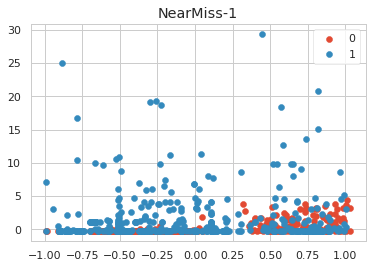

In [70]:
# Undersample imbalanced dataset with NearMiss-1


X_nearmiss, y_nearmiss = NearMiss(version=1, n_neighbors=3).fit_resample(X_org.values, y_org.values)
print('Near Miss Distribution: {}'.format(np.unique(y_nearmiss, return_counts=True)))
from numpy import where
from matplotlib import pyplot

counter = Counter(y_nearmiss)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_nearmiss == label)[0]
    pyplot.scatter( X_nearmiss[row_ix, 1], X_nearmiss[row_ix, 0],label=str(label))
pyplot.legend()
pyplot.title("NearMiss-1")

pyplot.show()

Near Miss Distribution: (array([0, 1]), array([492, 492]))
Counter({0: 492, 1: 492})


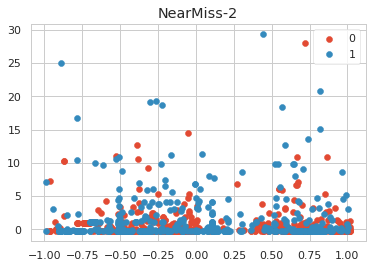

In [71]:
# Undersample imbalanced dataset with NearMiss-2


X_nearmiss, y_nearmiss = NearMiss(version=2, n_neighbors=3).fit_resample(X_org.values, y_org.values)
print('Near Miss Distribution: {}'.format(np.unique(y_nearmiss, return_counts=True)))
from numpy import where
from matplotlib import pyplot

counter = Counter(y_nearmiss)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_nearmiss == label)[0]
    pyplot.scatter( X_nearmiss[row_ix, 1], X_nearmiss[row_ix, 0],label=str(label))
pyplot.legend()
pyplot.title("NearMiss-2")

pyplot.show()

Near Miss Distribution: (array([0, 1]), array([416, 492]))
Counter({1: 492, 0: 416})


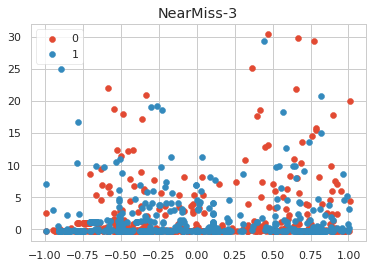

In [72]:
# Undersample imbalanced dataset with NearMiss-3


X_nearmiss, y_nearmiss = NearMiss(version=3, n_neighbors_ver3=3).fit_resample(X_org.values, y_org.values)
print('Near Miss Distribution: {}'.format(np.unique(y_nearmiss, return_counts=True)))
from numpy import where
from matplotlib import pyplot

counter = Counter(y_nearmiss)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_nearmiss == label)[0]
    pyplot.scatter( X_nearmiss[row_ix, 1], X_nearmiss[row_ix, 0],label=str(label))
pyplot.legend()
pyplot.title("NearMiss-3")
pyplot.show()

- #### i will use version3 of NearMiss

In [73]:
undersample_accuracy_lst = []
undersample_precision_lst = []
undersample_recall_lst = []
undersample_f1_lst = []
undersample_auc_lst = []


X_nearmiss, y_nearmiss = NearMiss(version=3, n_neighbors=3).fit_resample(X_org.values, y_org.values)
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(NearMiss(version=3, n_neighbors=3,sampling_strategy='majority'), log_reg_clf)
    undersample_model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    prediction = undersample_model.predict(original_Xtrain[test])
    
    undersample_accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision_lst.append(precision_score(original_ytrain[test], prediction))
    undersample_recall_lst.append(recall_score(original_ytrain[test], prediction))
    undersample_f1_lst.append(f1_score(original_ytrain[test], prediction))
    undersample_auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

    
print('accuracy: {}'.format(np.mean(undersample_accuracy_lst)))
print('precision: {}'.format(np.mean(undersample_precision_lst)))
print('recall: {}'.format(np.mean(undersample_recall_lst)))
print('f1_score: {}'.format(np.mean(undersample_f1_lst)))


accuracy: 0.9424479940287185
precision: 0.022047307537132816
recall: 0.7361895488477767
f1_score: 0.04278506561845252


In [74]:
labels = ['No Fraud', 'Fraud']
undersample_prediction = undersample_model.predict(original_Xtest)
print(classification_report(original_ytest, undersample_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.96      0.98     56863
       Fraud       0.02      0.54      0.05        98

    accuracy                           0.96     56961
   macro avg       0.51      0.75      0.51     56961
weighted avg       1.00      0.96      0.98     56961



- #### recall is so low 

#### Precision-Recall curve

- The precision-recall curve shows the tradeoff between precision and recall for different threshold.
- A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate

In [75]:

undersample_y_score = log_reg_clf.decision_function(original_Xtest)
undersample_y_score

array([-0.61182988,  1.79421506,  0.26947481, ..., -1.62498738,
       -1.0898254 , -2.15147311])

- 
A decision function is a function which takes a dataset as input and gives a decision as output. 
    - What the decision can be depends on the problem at hand. Examples include:

   - Estimation problems: the "decision" is the estimate.
   - Hypothesis testing problems: the decision is to reject or not reject the null hypothesis.
   - Classification problems: the decision is to classify a new observation (or observations) into a category.

In [76]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.05


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.05')

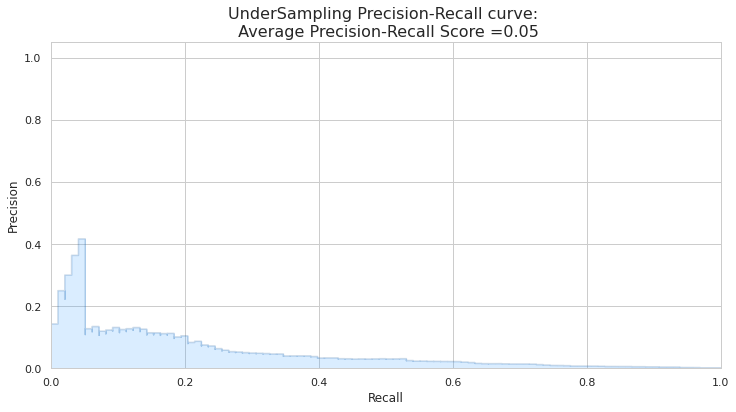

In [77]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

#### so the result is so bad , we will try oversampling

## SMOTE (Oversampling )

In [78]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))



Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


#### over sampling within cross validation

In [79]:
### our calssifiers
log_reg_params = {"penalty": [ 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)



In [80]:
# function to compare between all classifiers
best_est_total = []

def over_all_classifiers():

      MLA = [rand_log_reg]
      names = ["Logistic Regression" ]
      MLA_columns = []
      MLA_compare = pd.DataFrame(columns = MLA_columns)
      row_index = 0
      for alg in MLA:
        
        accuracy_lst = []
        precision_lst = []
        recall_lst = []
        f1_lst = []
        auc_lst = []
        for train, test in sss.split(original_Xtrain, original_ytrain):
            pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'),alg)
            # SMOTE happens during Cross Validation not before..
            model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
            best_est = alg.best_estimator_
            prediction = best_est.predict(original_Xtrain[test])

            accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
            precision_lst.append(precision_score(original_ytrain[test], prediction))
            recall_lst.append(recall_score(original_ytrain[test], prediction))
            f1_lst.append(f1_score(original_ytrain[test], prediction))
            auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
        MLA_compare.loc[row_index,'Model Name'] = names[row_index]
        MLA_compare.loc[row_index, 'Accuracy'] = np.mean(accuracy_lst)
        MLA_compare.loc[row_index, 'Precision'] = np.mean(precision_lst)
        MLA_compare.loc[row_index, 'Recall'] = np.mean(recall_lst)
        MLA_compare.loc[row_index, 'F1 score'] = np.mean(f1_lst)
        row_index+=1
        best_est_total.append( best_est )
      MLA_compare.sort_values(by = ['Accuracy'], ascending = False, inplace = True)    
      return MLA_compare

In [81]:
over_all_classifiers()

,Model Name,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.97127,0.066135,0.913762,0.122195


### classification report of logistic regression

In [82]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est_total[0].predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.19        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.59     56961
weighted avg       1.00      0.99      0.99     56961



#### precision_recall_curve

In [83]:
y_score = best_est_total[0].decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.75


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.75')

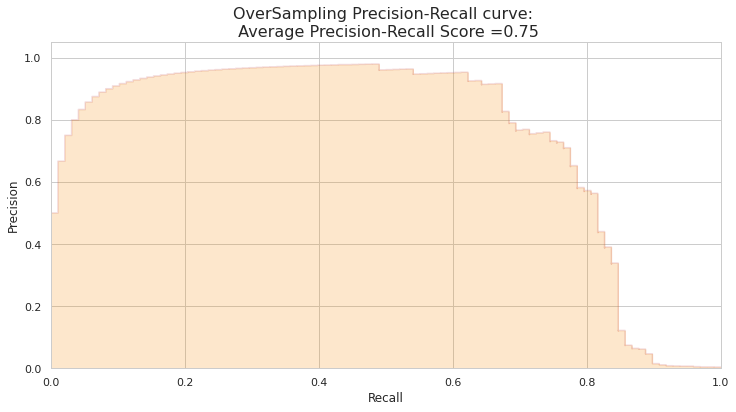

In [84]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F98B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

##### so we can see cleary the result is better in case of oversampling.

#### compare between undersampling && oversampling score

In [85]:
undersample_prediction = undersample_model.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, undersample_prediction)
smote_prediction = best_est_total[0].predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, smote_prediction)

data1 = {'Technique': ['Undersampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=data1)
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)
final_df

,Technique,Score
0,Undersampling,0.961202
1,Oversampling (SMOTE),0.987799


#### let's perdict using all the 5 classifiers

#### to compare with differents classifiers we will use X_test from undersampling tech.

In [86]:
# Logistic Regression using SMOTE technique
y_pred_log_reg = best_est_total[0].predict(X_test)

# Other models with UnderSampling
y_pred_knear = knn_clf.predict(X_test)
y_pred_svc = svc_clf.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)
tree_cf = confusion_matrix(y_test, y_pred_tree)
rf_cf = confusion_matrix(y_test, y_pred_rf)


Text(0.5, 1.0, ' Logistic Regression \nConfusion Matrix')

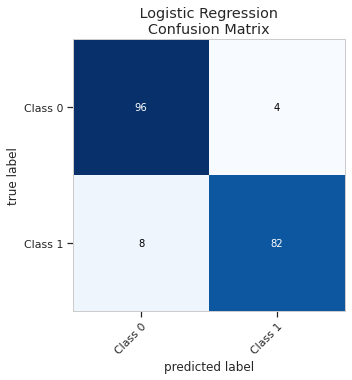

In [88]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(log_reg_cf ,class_names=  ['Class 0', 'Class 1'] ,figsize=(5.5,5),cmap = plt.get_cmap('Blues'))
plt.title(" Logistic Regression \nConfusion Matrix")

Text(0.5, 1.0, ' kneighbors \nConfusion Matrix')

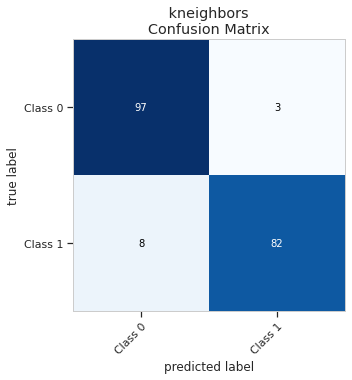

In [89]:

plot_confusion_matrix(kneighbors_cf ,class_names=  ['Class 0', 'Class 1'] ,figsize=(5.5,5),cmap = plt.get_cmap('Blues'))
plt.title(" kneighbors \nConfusion Matrix")

Text(0.5, 1.0, ' SVC \nConfusion Matrix')

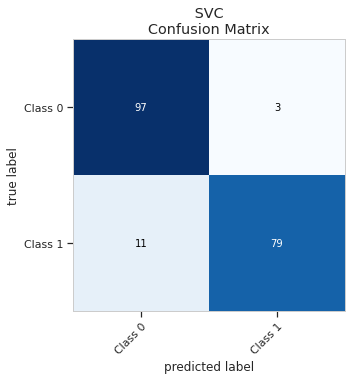

In [90]:

plot_confusion_matrix(svc_cf ,class_names=  ['Class 0', 'Class 1'] ,figsize=(5.5,5),cmap = plt.get_cmap('Blues'))
plt.title(" SVC \nConfusion Matrix")

Text(0.5, 1.0, ' Descion Tree \nConfusion Matrix')

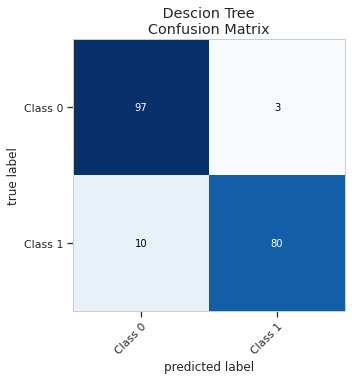

In [91]:

plot_confusion_matrix(tree_cf ,class_names=  ['Class 0', 'Class 1'] ,figsize=(5.5,5),cmap = plt.get_cmap('Blues'))
plt.title(" Descion Tree \nConfusion Matrix")

Text(0.5, 1.0, ' Random Forest \nConfusion Matrix')

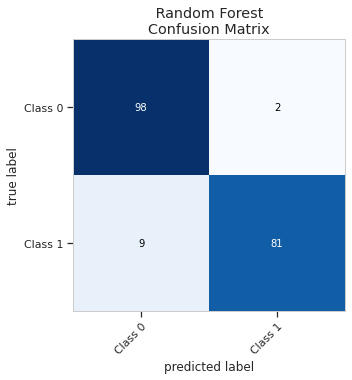

In [92]:

plot_confusion_matrix(rf_cf ,class_names=  ['Class 0', 'Class 1'] ,figsize=(5.5,5),cmap = plt.get_cmap('Blues'))
plt.title(" Random Forest \nConfusion Matrix")

In [93]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))
print("-"*45,'\n')

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))
print("-"*45,'\n')

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))
print("-"*45,'\n')

print('Descion Tree Classifier:')
print(classification_report(y_test, y_pred_tree))
print("-"*45,'\n')


print('Random Forest Classifier:')
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       100
           1       0.95      0.91      0.93        90

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

--------------------------------------------- 

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       100
           1       0.96      0.91      0.94        90

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

--------------------------------------------- 

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       100
           1       0.96      0.88      0.92        90

    accuracy        

- so the best models was logistic regresson and knn

### SMOTETomek
- Over-sampling using SMOTE and cleaning using Tomek links.

- Combine over_sampling and under_sampling using SMOTE and Tomek links.


### due to long time of training in this tech. , we will not consider it.

In [94]:
'''from imblearn.combine import SMOTETomek

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

rand_log_reg_t = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)'''

'from imblearn.combine import SMOTETomek\n\n# List to append the score and then find the average\naccuracy_lst = []\nprecision_lst = []\nrecall_lst = []\nf1_lst = []\nauc_lst = []\n\nrand_log_reg_t = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)'

In [95]:
'''
for train, test in sss.split(original_Xtrain, original_ytrain):
    print("Train:", train, "Test:", test)

    pipeline1 = imbalanced_make_pipeline(SMOTETomek(sampling_strategy='minority'), rand_log_reg_t)
    # SMOTETomek happens during Cross Validation not before..
    model_st = pipeline1.fit(original_Xtrain[train], original_ytrain[train])
    print("gggg")
    best_est_st = rand_log_reg_t.best_estimator_
    prediction_st = best_est_st.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline1.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction_st))
    recall_lst.append(recall_score(original_ytrain[test], prediction_st))
    f1_lst.append(f1_score(original_ytrain[test], prediction_st))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction_st))'''

'\nfor train, test in sss.split(original_Xtrain, original_ytrain):\n    print("Train:", train, "Test:", test)\n\n    pipeline1 = imbalanced_make_pipeline(SMOTETomek(sampling_strategy=\'minority\'), rand_log_reg_t)\n    # SMOTETomek happens during Cross Validation not before..\n    model_st = pipeline1.fit(original_Xtrain[train], original_ytrain[train])\n    print("gggg")\n    best_est_st = rand_log_reg_t.best_estimator_\n    prediction_st = best_est_st.predict(original_Xtrain[test])\n    \n    accuracy_lst.append(pipeline1.score(original_Xtrain[test], original_ytrain[test]))\n    precision_lst.append(precision_score(original_ytrain[test], prediction_st))\n    recall_lst.append(recall_score(original_ytrain[test], prediction_st))\n    f1_lst.append(f1_score(original_ytrain[test], prediction_st))\n    auc_lst.append(roc_auc_score(original_ytrain[test], prediction_st))'

In [96]:
'''print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)'''

'print("accuracy: {}".format(np.mean(accuracy_lst)))\nprint("precision: {}".format(np.mean(precision_lst)))\nprint("recall: {}".format(np.mean(recall_lst)))\nprint("f1: {}".format(np.mean(f1_lst)))\nprint(\'---\' * 45)'

In [97]:
'''labels = ['No Fraud', 'Fraud']
SMOTETomek_prediction = best_est_st.predict(original_Xtest)
print(classification_report(original_ytest, SMOTETomek_prediction, target_names=labels))
'''

"labels = ['No Fraud', 'Fraud']\nSMOTETomek_prediction = best_est_st.predict(original_Xtest)\nprint(classification_report(original_ytest, SMOTETomek_prediction, target_names=labels))\n"

#### precision_recall_curve

In [98]:
'''y_score_t = best_est_st.decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score_t)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))'''

"y_score_t = best_est_st.decision_function(original_Xtest)\naverage_precision = average_precision_score(original_ytest, y_score_t)\n\nprint('Average precision-recall score: {0:0.2f}'.format(\n      average_precision))"

In [99]:
'''fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score_t)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F98B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('SMOTETomek Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)'''

"fig = plt.figure(figsize=(12,6))\n\nprecision, recall, _ = precision_recall_curve(original_ytest, y_score_t)\n\nplt.step(recall, precision, color='r', alpha=0.2,\n         where='post')\nplt.fill_between(recall, precision, step='post', alpha=0.2,\n                 color='#F98B00')\n\nplt.xlabel('Recall')\nplt.ylabel('Precision')\nplt.ylim([0.0, 1.05])\nplt.xlim([0.0, 1.0])\nplt.title('SMOTETomek Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(\n          average_precision), fontsize=16)"

### compare between undersampling && oversampling score && SMOTETomek

In [100]:
'''undersample_prediction = undersample_model.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, undersample_prediction)
smote_prediction = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, smote_prediction)
SMOTETomek_prediction = best_est_st.predict(original_Xtest)
SMOTETomek_score = accuracy_score(original_ytest, SMOTETomek_prediction)

data = {'Technique': ['Undersampling', 'Oversampling (SMOTE)' , 'SMOTETomek'], 'Score': [undersample_score, oversample_score,SMOTETomek_score]}
final_df = pd.DataFrame(data=data)
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)
final_df'''

"undersample_prediction = undersample_model.predict(original_Xtest)\nundersample_score = accuracy_score(original_ytest, undersample_prediction)\nsmote_prediction = best_est.predict(original_Xtest)\noversample_score = accuracy_score(original_ytest, smote_prediction)\nSMOTETomek_prediction = best_est_st.predict(original_Xtest)\nSMOTETomek_score = accuracy_score(original_ytest, SMOTETomek_prediction)\n\ndata = {'Technique': ['Undersampling', 'Oversampling (SMOTE)' , 'SMOTETomek'], 'Score': [undersample_score, oversample_score,SMOTETomek_score]}\nfinal_df = pd.DataFrame(data=data)\nscore = final_df['Score']\nfinal_df.drop('Score', axis=1, inplace=True)\nfinal_df.insert(1, 'Score', score)\nfinal_df"